![chloe](chloe.png)

In [364]:
import pandas as pd
import matplotlib.pyplot as plt

In [365]:
history_df   = pd.read_csv('artist_history.csv',parse_dates=['metric_week'])
#history_df   = pd.read_csv('artist_history.csv',parse_dates=['metric_week']).sort_values(by='metric_week')

names_df     = pd.read_csv('artist_names.csv')
playlists_df = pd.read_csv('artist_playlists.csv')
releases_df  = pd.read_csv('artist_releases.csv',parse_dates=['first_release_date'])
#releases_df  = pd.read_csv('artist_releases.csv',parse_dates=['first_release_date']).sort_values(by='first_release_date')


In [366]:
#Make dataframe for Chloe Lilac
df_chloe = names_df[names_df['artist_name'].str.contains('Chloe Lilac')]
#Find her snafu ID
snafu_id = df_chloe.iloc[0]['artist_snafu_id']
#Fetch the history of Chloe
history_chloe = history_df.loc[history_df.artist_snafu_id == snafu_id]
h = history_chloe[history_chloe['platform'].str.contains('spotify')]
hyt = history_chloe[history_chloe['platform'].str.contains('youtube')]
sp_info = h.metric.unique()
yt_info = hyt.metric.unique()
print(sp_info)
print(yt_info)
#history_chloe[history_chloe['metric'].str.contains('followers')]


['popularity' 'followers' 'listeners' 'followers_to_listeners_ratio']
['subscribers' 'views' 'comments' 'videos']


In [520]:
#Load releases info
releases_chloe = releases_df.loc[releases_df.artist_snafu_id==snafu_id]
#Map album (==0) or single(==1) to number 
releases_chloe = releases_chloe.assign(mapalbum=releases_chloe.album_type.map(lambda x: 10 if x=="single" else 1).values)
#releases_chloe = releases_chloe.sort_values(by='first_release_date')


### Characterisation
- Before deciding who to compare her with let's understand how Chloe looks like
- Let's have a look at all her information and see if we find any correlation among the variable

Text(0.5, 0, '')

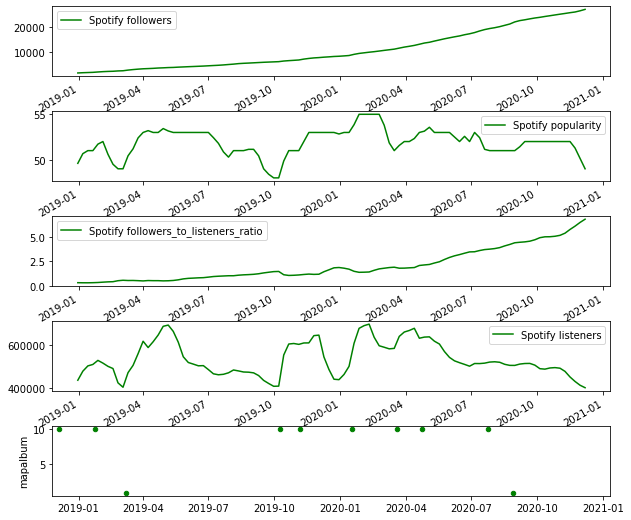

In [544]:
#fig, ax = plt.subplots()
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)
fig.subplots_adjust(hspace=.5)
#fig, (ax0,ax1,ax2) = plt.subplots(3,1, sharex=True, sharey=False)
# Make a dataframe with spotify information
df_spotify = history_chloe[history_chloe['platform'].str.contains('spotify')]

sp_info = ["followers","popularity","followers_to_listeners_ratio","listeners"] #TODO: fetch it from metric using unique
#for i in range(len(sp_info)):
#    axi = "ax"+str(i+1)
#Be careful with followers because you may plot together two categories
#Better use regex eventually in case i have a lot of metrics
df_spotify[df_spotify['metric'].str.contains(sp_info[0]) & ~df_spotify['metric'].str.contains('ratio')].plot(ax=ax1,kind='line',x='metric_week',y='value',color='green',label='Spotify '+sp_info[0])
df_spotify[df_spotify['metric'].str.contains(sp_info[1])].plot(ax=ax2,kind='line',x='metric_week',y='value',color='green',label='Spotify '+sp_info[1])
df_spotify[df_spotify['metric'].str.contains(sp_info[2])].plot(ax=ax3,kind='line',x='metric_week',y='value',color='green',label='Spotify '+sp_info[2])
df_spotify[df_spotify['metric'].str.contains(sp_info[3]) & ~df_spotify['metric'].str.contains('ratio')].plot(ax=ax4,kind='line',x='metric_week',y='value',color='green',label='Spotify '+sp_info[3])
releases_chloe.plot(ax=ax5,kind='scatter',x='first_release_date',y='mapalbum',color='green')
#it looks aweful
#releases_chloe.plot.bar(ax=ax5,x='first_release_date',y='mapalbum',color='blue')


#print(d['value']-d['value'].shift(1))

ax5.set_xlim(ax2.get_xlim())
ax5.set_xlabel('')



### Some thoughts
- Followers increase quite steadily... keep an eye on this but not  much info to get from it
- Popularity sounds promising as a variable but it's calculated from the popularity of all the artist’s tracks, so maybe a not very popular track decreases the whole popularity
- Might be useful to know a bit more about this variable (is it averaged over time? for how long? ) then we can see significant changes in it and correlate it with other variables
    - Is it calculated assigning different weights to tracks with low number of listeners?
    - Is it averaged over time?
    - For how long?
    - If I had more information on the listeners you can make a smarter variable
    
- Listeners seems to be the most relevant variable

<ipython-input-543-341f1e7ba496>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_popularity['pct'] = d_popularity['value'].pct_change(1)
<ipython-input-543-341f1e7ba496>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_listeners['pct']  = d_listeners['value'].pct_change(1)


(17860.65, 18638.35)

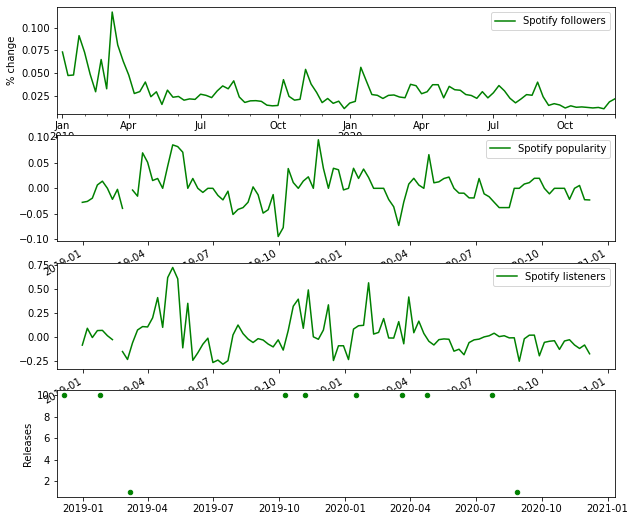

In [543]:
d_followers         = df_spotify[df_spotify['metric'].str.contains(sp_info[0]) & ~df_spotify['metric'].str.contains('ratio')].sort_values('metric_week')
d_followers['pct']  = d_followers['value'].pct_change(1)

d_popularity        = df_spotify[df_spotify['metric'].str.contains(sp_info[1])]
d_popularity['pct'] = d_popularity['value'].pct_change(1)       

d_listeners         = df_spotify[df_spotify['metric'].str.contains(sp_info[3]) & ~df_spotify['metric'].str.contains('ratio')]
d_listeners['pct']  = d_listeners['value'].pct_change(1)


fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
axx1 = fig.add_subplot(411)
axx2 = fig.add_subplot(412)
axx3 = fig.add_subplot(413)
axx4 = fig.add_subplot(414)
#fig.subplots_adjust(hspace=.1)

d_followers.plot(ax=axx1,kind='line',x='metric_week',y='pct',color='green',label='Spotify '+sp_info[0])
d_popularity.plot(ax=axx2,kind='line',x='metric_week',y='pct',color='green',label='Spotify '+sp_info[1])
d_listeners.plot(ax=axx3,kind='line',x='metric_week',y='pct',color='green',label='Spotify '+sp_info[3])
releases_chloe.plot(ax=axx4,kind='scatter',x='first_release_date',y='mapalbum',color='green')
axx1.set(xlabel="", ylabel="% change")
axx4.set(xlabel="", ylabel="Releases")

axx4.set_xlim(axx3.get_xlim())


### What can we learn from this?
- Indeed followers doesn't give us that much information
    - Probably will not decrease despite what she does
    - It will be a biproduct of the views
- Popularity oscillates $\pm$10% and we don't really know how it was calculated
- Listeners looks good!
    - Every time there's a release the listeners increase
    - The impact of the first album was not the same as the second one
    - But the last album was released at the end of 2020 (weird year) (also the previous single didn't impact much)
    - Was covid the culprit of the decrease in listeners?
    - Maybe add a column with the topic of the track? 

In [370]:
#Make some function that checks a release date, looks for the closest metric_week for some metric


Text(0.5, 0, '')

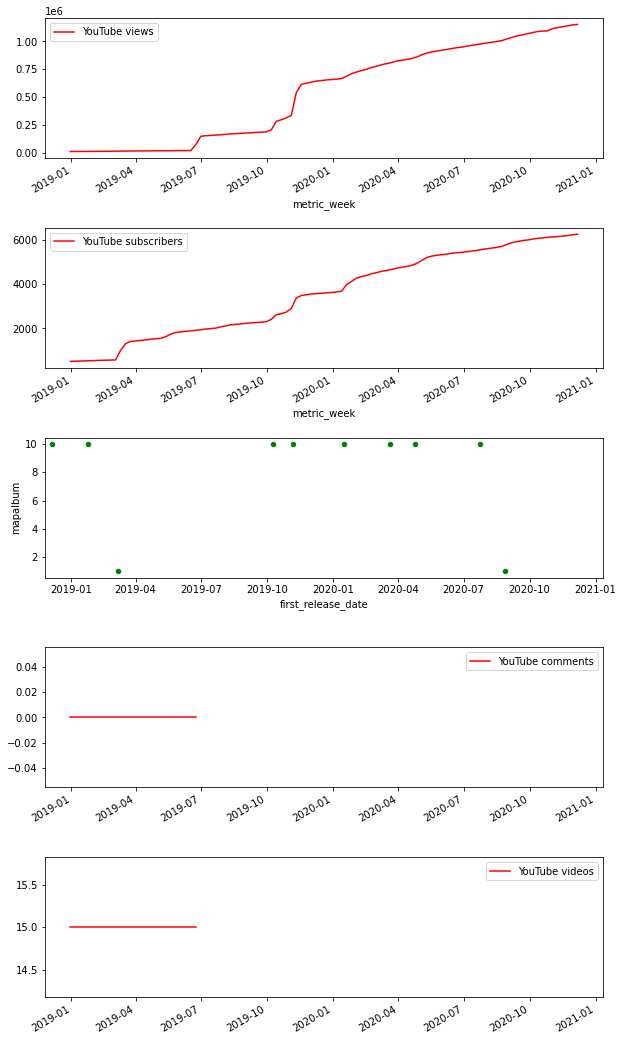

In [542]:
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(10)
ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)
fig.subplots_adjust(hspace=.5) #fix x axis for two first plts
# Make a dataframe with youtube information
df_youtube = history_chloe[history_chloe['platform'].str.contains('youtube')]
yt_info = ["views","subscribers","comments","videos"] #TODO: fetch it from metric using unique

df_youtube[df_youtube['metric'].str.contains(yt_info[0])].plot(ax=ax1, kind='line',x='metric_week',y='value',color='red',label='YouTube '+yt_info[0])
df_youtube[df_youtube['metric'].str.contains(yt_info[1])].plot(ax=ax2, kind='line',x='metric_week',y='value',color='red',label='YouTube '+yt_info[1])
df_youtube[df_youtube['metric'].str.contains(yt_info[2])].plot(ax=ax4, kind='line',x='metric_week',y='value',color='red',label='YouTube '+yt_info[2])
df_youtube[df_youtube['metric'].str.contains(yt_info[3])].plot(ax=ax5, kind='line',x='metric_week',y='value',color='red',label='YouTube '+yt_info[3])
ax4.set_xlabel('')

releases_chloe.plot(ax=ax3,kind='scatter',x='first_release_date',y='mapalbum',color='green')

#Harmonise x axis range
ax3.set_xlim(ax2.get_xlim())
ax4.set_xlim(ax2.get_xlim())
ax5.set_xlim(ax2.get_xlim())
ax5.set_xlabel('')


### Anything new?
- At first sight, and with the available information youtube metrics don't show any particular behaviour different than what is expected
- We don't get any boost after a releases (both singles or album) in 2020

### Let's find some criteria to compare her with other artists
- For now, we'll only check artists in the same playlists as she is
- We can see which artists got large boosts during 2020
- Some conditions on the initial state could be added (start like chloe and end above)
- Only use spotify's listeners

Text(2660, 403172.666667, 'Chloe')

<Figure size 432x288 with 0 Axes>

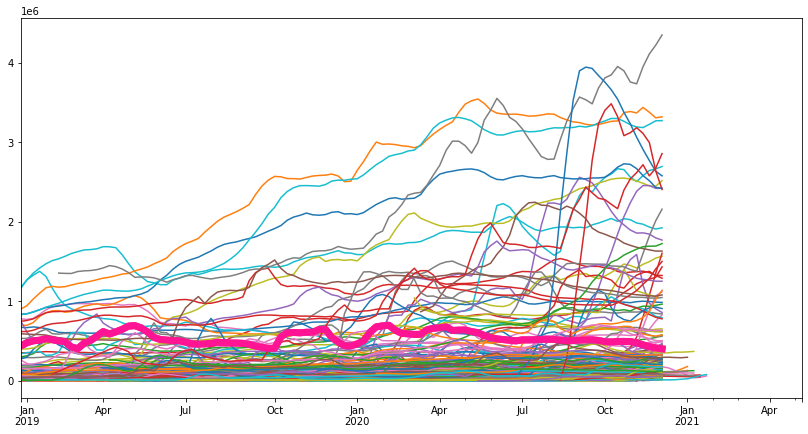

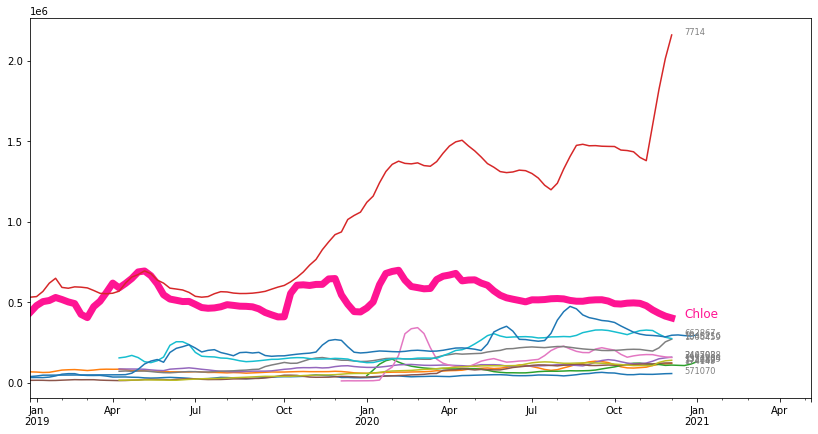

In [546]:
#Fetch chloes playlists
playlists_chloe = playlists_df.loc[playlists_df.artist_snafu_id == snafu_id]
#Create a series with the ID of all the artists in that playlist
artists_snafu_id_pl = playlists_df.artist_snafu_id[playlists_df.name == playlists_chloe.name.unique()[1]]

#Filter history and releases dataframes keeping only the artists in Chloe's playlist
history_pl_df = history_df[history_df['artist_snafu_id'].isin(artists_snafu_id_pl)]
releases_pl_df = releases_df[releases_df['artist_snafu_id'].isin(artists_snafu_id_pl)]
names_pl_df = names_df[names_df['artist_snafu_id'].isin(artists_snafu_id_pl)]

fig = plt.figure()

artist_pl = list(playlists_df.artist_snafu_id[playlists_df.name == playlists_chloe.name.unique()[1]].unique())

survivors = []

df_chloe = history_pl_df.loc[(history_pl_df['artist_snafu_id']==snafu_id) & \
history_pl_df['platform'].str.contains('spotify') & \
history_pl_df['metric'].str.contains('listeners') & \
~history_pl_df['metric'].str.contains('ratio')].sort_values(by='metric_week')
ax1 = df_chloe.plot(kind='line',x='metric_week',y='value',xlabel='',color='deeppink', linewidth=7,legend=None)
ax4 = df_chloe.plot(kind='line',x='metric_week',y='value',xlabel='',color='deeppink', linewidth=7,legend=None)
for i in range(len(artist_pl)):
#for i in range(10):
    df = history_pl_df.loc[(history_pl_df['artist_snafu_id']==artist_pl[i]) & \
                      history_pl_df['platform'].str.contains('spotify') & \
                     history_pl_df['metric'].str.contains('listeners') & \
                     ~history_pl_df['metric'].str.contains('ratio')].sort_values(by='metric_week')
    name=df['artist_snafu_id'].iloc[0]
    #Get the last cell of value (y position)
    y_position = df.loc[df.index[-1],'value']
    #Uncomment next files if you want to see the ids (but it's too messy... better to filter first)
    #if name == snafu_id:
    #    ax1.text(2660, y_position, 'Chloe', horizontalalignment='left', size='small', color='grey')
    #else:
    #    ax1.text(2660, y_position, name, horizontalalignment='left', size='small', color='grey')
    df.plot(ax=ax1,kind='line',x='metric_week',y='value',xlabel='',legend=None)
    start_date_index = 999
    for j in range(len(df.metric_week)):
        if df.iloc[j]['metric_week'] < datetime.date(2020, 4, 1): continue
        #if df.iloc[j]['metric_week'] < datetime.date(2020, 1, 1): continue
        else: 
            start_date_index=j
            break
    change = round((df.iloc[len(df.metric_week)-1]['value'] - df.iloc[start_date_index]['value'])*100/df.iloc[start_date_index]['value'],2)
    # Make a list with dataframes of the artists with changes larger than XX% 
    # not sure if this is optimal
    #TODO remove artists with first releases at the beginning of 2020 since changes can be due to being new
    #print(s_id,change)
    if change > 40 and change <60: 
        survivors.append(df)
        df.plot(ax=ax4,kind='line',x='metric_week',y='value',xlabel='',legend=None)
        ax4.text(2660, y_position, name, horizontalalignment='left', size='small', color='grey')
        plt.xlim([2557, 2680])
        #plt.figure(figsize=(10, 10))
        #plt.show()
        
#Plot again chloe just for visualilsation

df_chloe.plot(ax=ax1,kind='line',x='metric_week',y='value',xlabel='',color='deeppink', linewidth=7,legend=None)
ax1.set_xlim([2557, 2680])
ax4.figure.set_size_inches(14, 7)
ax1.figure.set_size_inches(14, 7)
ax4.text(2660, df_chloe.loc[df_chloe.index[-1],'value'], 'Chloe', horizontalalignment='left', size='large', color='deeppink')


### Several options
- We can compare with all of the remaining artists
- Most of them have way less listeners than Chloe
- There is one with quite a similar behaviour who was in the same conditions as her but in 2020 increased the number of listeners
    - Let's check who she/they/he is

In [503]:
#What's the name of the artist?
names_df.loc[(names_df['artist_snafu_id']==7714)]

,Unnamed: 0,artist_snafu_id,artist_name
33375,33376,7714,Sody


![sody](sody.png)

In [535]:
#Let's look at Sody's history

history_sody = history_pl_df.loc[(history_pl_df['artist_snafu_id']==7714)]

releases_sody = releases_df.loc[releases_df.artist_snafu_id==7714]
releases_sody = releases_sody.assign(mapalbum=releases_sody.album_type.map(lambda x: 11 if x=="single" else 2).values)

Text(0.5, 0, '')

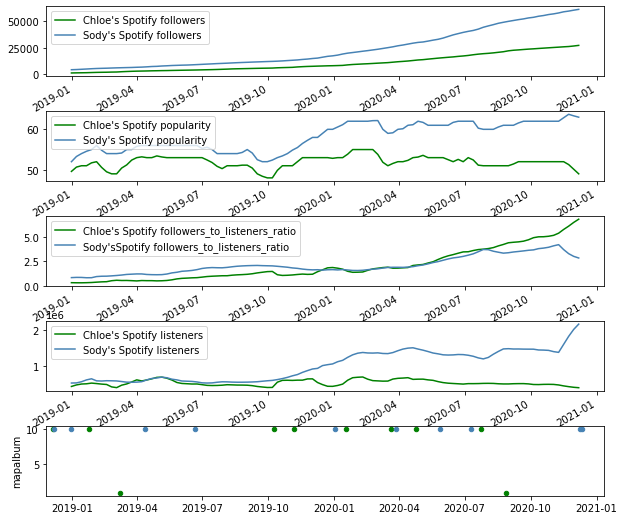

In [534]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)
fig.subplots_adjust(hspace=.5)
# Make a dataframe with spotify information
df_spotify_chloe = history_chloe[history_chloe['platform'].str.contains('spotify')]
df_spotify_sody = history_sody[history_sody['platform'].str.contains('spotify')]

sp_info = ["followers","popularity","followers_to_listeners_ratio","listeners"] #TODO: fetch it from metric using unique
df_spotify_chloe[df_spotify_chloe['metric'].str.contains(sp_info[0]) & ~df_spotify_chloe['metric'].str.contains('ratio')].plot(ax=ax1,kind='line',x='metric_week',y='value',color='green',label='Chloe\'s Spotify '+sp_info[0])
df_spotify_sody[df_spotify_sody['metric'].str.contains(sp_info[0]) & ~df_spotify_sody['metric'].str.contains('ratio')].plot(ax=ax1,kind='line',x='metric_week',y='value',color='steelblue',label='Sody\'s Spotify '+sp_info[0])
df_spotify_chloe[df_spotify_chloe['metric'].str.contains(sp_info[1])].plot(ax=ax2,kind='line',x='metric_week',y='value',color='green',label='Chloe\'s Spotify '+sp_info[1])
df_spotify_sody[df_spotify_sody['metric'].str.contains(sp_info[1])].plot(ax=ax2,kind='line',x='metric_week',y='value',color='steelblue',label='Sody\'s Spotify '+sp_info[1])
df_spotify_chloe[df_spotify_chloe['metric'].str.contains(sp_info[2])].plot(ax=ax3,kind='line',x='metric_week',y='value',color='green',label='Chloe\'s Spotify '+sp_info[2])
df_spotify_sody[df_spotify_sody['metric'].str.contains(sp_info[2])].plot(ax=ax3,kind='line',x='metric_week',y='value',color='steelblue',label='Sody\'sSpotify '+sp_info[2])
df_spotify_chloe[df_spotify_chloe['metric'].str.contains(sp_info[3]) & ~df_spotify_chloe['metric'].str.contains('ratio')].plot(ax=ax4,kind='line',x='metric_week',y='value',color='green',label='Chloe\'s Spotify '+sp_info[3])
df_spotify_sody[df_spotify_sody['metric'].str.contains(sp_info[3]) & ~df_spotify_sody['metric'].str.contains('ratio')].plot(ax=ax4,kind='line',x='metric_week',y='value',color='steelblue',label='Sody\'s Spotify '+sp_info[3])
releases_chloe.plot(ax=ax5,kind='scatter',x='first_release_date',y='mapalbum',color='green')
releases_sody.plot(ax=ax5,kind='scatter',x='first_release_date',y='mapalbum',color='steelblue')

ax5.set_xlim(ax2.get_xlim())
ax5.set_xlabel('')



Text(0.5, 0, '')

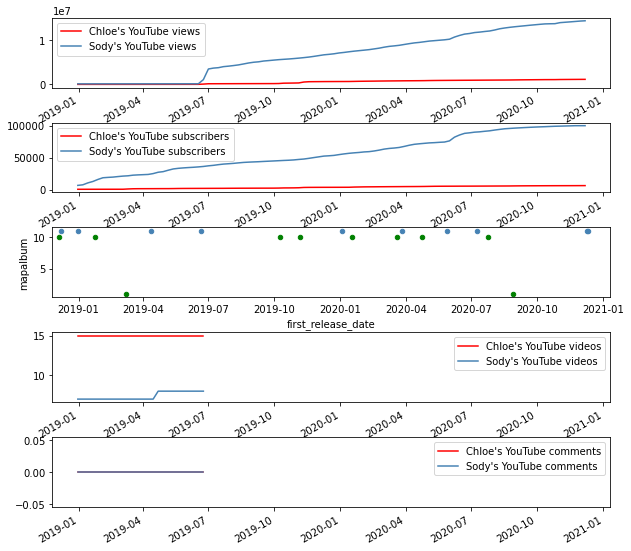

In [545]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax1 = fig.add_subplot(511)
ax2 = fig.add_subplot(512)
ax3 = fig.add_subplot(513)
ax4 = fig.add_subplot(514)
ax5 = fig.add_subplot(515)
fig.subplots_adjust(hspace=.5) #fix x axis for two first plts

# Make a dataframe with youtube information
df_youtube_chloe = history_chloe[history_chloe['platform'].str.contains('youtube')]
df_youtube_sody = history_sody[history_sody['platform'].str.contains('youtube')]
yt_info = ["views","subscribers","comments","videos"] 

df_youtube_chloe[df_youtube_chloe['metric'].str.contains(yt_info[0])].plot(ax=ax1, kind='line',x='metric_week',y='value',color='red',label='Chloe\'s YouTube '+yt_info[0])
df_youtube_chloe[df_youtube_chloe['metric'].str.contains(yt_info[1])].plot(ax=ax2, kind='line',x='metric_week',y='value',color='red',label='Chloe\'s YouTube '+yt_info[1])
df_youtube_chloe[df_youtube_chloe['metric'].str.contains(yt_info[2])].plot(ax=ax5, kind='line',x='metric_week',y='value',color='red',label='Chloe\'s YouTube '+yt_info[2])
df_youtube_chloe[df_youtube_chloe['metric'].str.contains(yt_info[3])].plot(ax=ax4, kind='line',x='metric_week',y='value',color='red',label='Chloe\'s YouTube '+yt_info[3])
df_youtube_sody[df_youtube_sody['metric'].str.contains(yt_info[0])].plot(ax=ax1, kind='line',x='metric_week',y='value',color='steelblue',label='Sody\'s YouTube '+yt_info[0])
df_youtube_sody[df_youtube_sody['metric'].str.contains(yt_info[1])].plot(ax=ax2, kind='line',x='metric_week',y='value',color='steelblue',label='Sody\'s YouTube '+yt_info[1])
df_youtube_sody[df_youtube_sody['metric'].str.contains(yt_info[2])].plot(ax=ax5, kind='line',x='metric_week',y='value',color='steelblue',label='Sody\'s YouTube '+yt_info[2])
df_youtube_sody[df_youtube_sody['metric'].str.contains(yt_info[3])].plot(ax=ax4, kind='line',x='metric_week',y='value',color='steelblue',label='Sody\'s YouTube '+yt_info[3])
ax4.set_xlabel('')

releases_chloe.plot(ax=ax3,kind='scatter',x='first_release_date',y='mapalbum',color='green')
releases_sody.plot(ax=ax3,kind='scatter',x='first_release_date',y='mapalbum',color='steelblue')

#Harmonise x axis range
ax3.set_xlim(ax2.get_xlim())
ax4.set_xlim(ax2.get_xlim())
ax5.set_xlim(ax2.get_xlim())
ax5.set_xlabel('')


### Conclusions 
- Start releasing only singles
  - If listeners going up wait and if a long time passed, release.
  - Whenever listeners start going down
- More time to look at more artists
- Choose artists with different criteria (play with change variable)
